#Anchor Box Calculation



In [ ]:
import matplotlib.pyplot as plt

class main:
  def __init__(self,no):
    self.num_clusters = no

   
args = main(9)

'''
Created on Feb 20, 2017
@author: jumabek
'''
from os import listdir
from os.path import isfile, join
import argparse
#import cv2
import numpy as np
import sys
import os
import shutil
import random 
import math

width_in_cfg_file = 1248.
height_in_cfg_file = 1248.

def IOU(X,centroids):
    similarities = []
    k = len(centroids)
    for centroid in centroids:
        c_x,c_y,c_z = centroid
        x,y,z = X
        inner_vol = min(x,c_x)*min(y,c_y)*min(z,c_z)
        similarity = inner_vol/((x*y*z+c_x*c_y*c_z)-inner_vol)
        similarities.append(similarity) # will become (k,) shape
    return np.array(similarities) 

def avg_IOU(X,centroids):
    n,d = X.shape
    sum = 0.
    for i in range(X.shape[0]):
        #note IOU() will return array which contains IoU for each centroid and X[i] // slightly ineffective, but I am too lazy
        sum+= max(IOU(X[i],centroids)) 
    return sum/n

def write_anchors_to_file(centroids,X,anchor_file):
    f = open(anchor_file,'w')
    
    anchors = centroids.copy()
    print(anchors.shape)

    for i in range(anchors.shape[0]):
        anchors[i][0]*=width_in_cfg_file
        anchors[i][1]*=height_in_cfg_file
        anchors[i][2]*= 5
         

    widths = anchors[:,0]+ anchors[:,1]
    sorted_indices = np.argsort(widths)

    print('Anchors = ', anchors[sorted_indices])
        
    for i in sorted_indices[:-1]:
        f.write('%0.5f,%0.5f,%0.5f, '%(anchors[i,0],anchors[i,1],anchors[i,2]))

    #there should not be comma after last anchor, that's why
    f.write('%0.5f,%0.5f,%0.5f\n'%(anchors[sorted_indices[-1:],0],anchors[sorted_indices[-1:],1],anchors[sorted_indices[-1:],2]))
    
    f.write('%f\n'%(avg_IOU(X,centroids)))
    plt.scatter(centroids.shape[0], avg_IOU(X,centroids))

def kmeans(X,centroids,eps,anchor_file):
    
    N = X.shape[0]
    iterations = 0
    k,dim = centroids.shape
    print("k,dim =",k,dim)
    prev_assignments = np.ones(N)*(-1)    
    iter = 0
    old_D = np.zeros((N,k))

    while True:
        D = [] 
        iter+=1           
        for i in range(N):
            d = 1 - IOU(X[i],centroids)
            D.append(d)
        D = np.array(D) # D.shape = (N,k)
        
        print("iter {}: dists = {}".format(iter,np.sum(np.abs(old_D-D))))
            
        #assign samples to centroids 
        assignments = np.argmin(D,axis=1)
        
        if (assignments == prev_assignments).all() :
            print("Centroids = ",centroids)
            write_anchors_to_file(centroids,X,anchor_file)
            return

        #calculate new centroids
        centroid_sums=np.zeros((k,dim),np.float)
        for i in range(N):
            centroid_sums[assignments[i]]+=X[i]        
        for j in range(k):            
            centroids[j] = centroid_sums[j]/(np.sum(assignments==j))
        
        prev_assignments = assignments.copy()     
        old_D = D.copy()  

    

annotation_dims = []

size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    x,y,z = annotation['size']
    x = float(x) / 140.
    y = float(y) / 140.
    z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
#print(annotation_dims)  
annotation_dims = np.array(annotation_dims)

eps = 0.005

if args.num_clusters == 0:
    for num_clusters in range(1,11): #we make 1 through 10 clusters 
        anchor_file = 'anchors%d.txt'%(num_clusters)

        indices = [ random.randrange(annotation_dims.shape[0]) for i in range(num_clusters)]
        centroids = annotation_dims[indices]
        kmeans(annotation_dims,centroids,eps,anchor_file)
        print('centroids.shape', centroids.shape)
else:
    anchor_file = 'anchors%d.txt'%(args.num_clusters)
    indices = [ random.randrange(annotation_dims.shape[0]) for i in range(args.num_clusters)]
    centroids = annotation_dims[indices]
    kmeans(annotation_dims,centroids,eps,anchor_file)
    print('centroids.shape', centroids.shape)



In [ ]:
from collections import Counter 

annotation_dims = []
cat = []
size = np.zeros((1,1,3))
file_path = '/gdrive/My Drive/data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  sensor = 'LIDAR_TOP'
  lidar_top_data = nusc.get('sample_data', sample['data'][sensor])
  ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
  for annotation in sample['anns']:
    annotation = nusc.get('sample_annotation',annotation)
    print(annotation['size'],annotation['category_name'])
    x,y,z = annotation['size']
    cat.append(annotation['category_name'])
    #x = float(x) / 140.
    #y = float(y) / 140.
    #z = float(z) / 5.
    annotation_dims.append(tuple(map(float,(x,y,z))))
print(annotation_dims)
d = Counter(cat)   
print(d)
print(annotation_dims[1])
print(max(x[0] for x in annotation_dims))
print(max(x[1] for x in annotation_dims))
print(max(x[2] for x in annotation_dims))
#print(sum(annotation_dims[:,1]))
#print(sum(annotation_dims[:,2]))

In [ ]:
!pip3 install terminaltables
!pip install nuscenes-devkit
!pip install turfpy
!pip install wandb

#data test

In [ ]:
import matplotlib.pyplot as plt
i = ListDataset(train_samples)


In [ ]:
img, targets = i.__getitem__(2)
dpi = 80
print(img.shape)
im_data = img.permute(1, 2, 0)
height, width, depth = 1024, 1024, 3

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
ax.imshow(im_data, cmap='gray')

plt.show()
#print(targets)

In [ ]:
img, targets = i.__getitem__(1)
plt.imshow(  img.permute(1, 2, 0)  )

#Start off

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes 

nusc = NuScenes(version='v1.0-trainval', dataroot='data', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 36.724 seconds.
Reverse indexing ...
Done reverse indexing in 9.4 seconds.


In [2]:
#import wandb
#wandb.init()

In [3]:

from __future__ import division

from terminaltables import AsciiTable

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

#Utils

In [4]:
#Angle Decoder

def angle_decoder(r):
  teta1 = torch.asin(2*r[0] - 1)
  teta2 = torch.acos(2*r[1] - 1)
  teta = 0
  if 2*r[0] - 1 >= 0 and 2*r[1] - 1 >= 0:
    teta = (teta1+teta2)/2
  elif 2*r[0] - 1 >= 0 and 2*r[1] - 1 < 0:
    teta = (math.pi-teta1+teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 <= 0:
    teta = (math.pi - teta1+2*math.pi -teta2)/2
  elif 2*r[0] - 1 < 0 and 2*r[1] - 1 > 0:
    teta = (2*math.pi + teta1+2*math.pi - teta2)/2
  return teta

In [5]:
#Utils

from __future__ import division
import math
import time
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from shapely.geometry import Polygon


def to_cpu(tensor):
    return tensor.detach().cpu()

def rotate_around_point(point, radians, origin=(0, 0)):
  """Rotate a point around a given point.
  
  I call this the "low performance" version since it's recalculating
  the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
  It's more readable than the next function, though.
  """
  x, y = point
  ox, oy = origin

  qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
  qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

  return qx.item(), qy.item()

def load_classes(path):
    """
    Loads class labels at 'path'
    """
    fp = open(path, "r")
    names = fp.read().split("\n")[:-1]
    return names


def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


def rescale_boxes(boxes, current_dim, original_shape):
    """ Rescales bounding boxes to the original shape """
    orig_h, orig_w = original_shape
    # The amount of padding that was added
    pad_x = max(orig_h - orig_w, 0) * (current_dim / max(original_shape))
    pad_y = max(orig_w - orig_h, 0) * (current_dim / max(original_shape))
    # Image height and width after padding is removed
    unpad_h = current_dim - pad_y
    unpad_w = current_dim - pad_x
    # Rescale bounding boxes to dimension of original image
    boxes[:, 0] = ((boxes[:, 0] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 1] = ((boxes[:, 1] - pad_y // 2) / unpad_h) * orig_h
    boxes[:, 2] = ((boxes[:, 2] - pad_x // 2) / unpad_w) * orig_w
    boxes[:, 3] = ((boxes[:, 3] - pad_y // 2) / unpad_h) * orig_h
    return boxes


def ap_per_class(tp, conf, pred_cls, target_cls):
    """ Compute the average precision, given the recall and precision curves.
    Source: https://github.com/rafaelpadilla/Object-Detection-Metrics.
    # Arguments
        tp:    True positives (list).
        conf:  Objectness value from 0-1 (list).
        pred_cls: Predicted object classes (list).
        target_cls: True object classes (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """

    # Sort by objectness
    i = np.argsort(-conf)
    tp, conf, pred_cls = tp[i], conf[i], pred_cls[i]

    # Find unique classes
    unique_classes = np.unique(target_cls)

    # Create Precision-Recall curve and compute AP for each class
    ap, p, r = [], [], []
    for c in tqdm.tqdm(unique_classes, desc="Computing AP"):
        i = pred_cls == c
        n_gt = (target_cls == c).sum()  # Number of ground truth objects
        n_p = i.sum()  # Number of predicted objects

        if n_p == 0 and n_gt == 0:
            continue
        elif n_p == 0 or n_gt == 0:
            ap.append(0)
            r.append(0)
            p.append(0)
        else:
            # Accumulate FPs and TPs
            fpc = (1 - tp[i]).cumsum()
            tpc = (tp[i]).cumsum()

            # Recall
            recall_curve = tpc / (n_gt + 1e-16)
            r.append(recall_curve[-1])

            # Precision
            precision_curve = tpc / (tpc + fpc)
            p.append(precision_curve[-1])

            # AP from recall-precision curve
            ap.append(compute_ap(recall_curve, precision_curve))

    # Compute F1 score (harmonic mean of precision and recall)
    p, r, ap = np.array(p), np.array(r), np.array(ap)
    f1 = 2 * p * r / (p + r + 1e-16)

    return p, r, ap, f1, unique_classes.astype("int32")


def compute_ap(recall, precision):
    """ Compute the average precision, given the recall and precision curves.
    Code originally from https://github.com/rbgirshick/py-faster-rcnn.

    # Arguments
        recall:    The recall curve (list).
        precision: The precision curve (list).
    # Returns
        The average precision as computed in py-faster-rcnn.
    """
    # correct AP calculation
    # first append sentinel values at the end
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))

    # compute the precision envelope
    for i in range(mpre.size - 1, 0, -1):
        mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

    # to calculate area under PR curve, look for points
    # where X axis (recall) changes value
    i = np.where(mrec[1:] != mrec[:-1])[0]

    # and sum (\Delta recall) * prec
    ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap


def get_batch_statistics(outputs, targets, iou_threshold):
    """ Compute true positives, predicted scores and predicted labels per sample """
    batch_metrics = []
    for sample_i in range(len(outputs)):

        if outputs[sample_i] is None:
            continue

        output = outputs[sample_i]
        pred_boxes = output[:, :8]
        pred_scores = output[:, 8]
        pred_labels = output[:, -1]

        true_positives = np.zeros(pred_boxes.shape[0])

        annotations = targets[targets[:, 0] == sample_i][:, 1:]
        target_labels = annotations[:, 0] if len(annotations) else []
        if len(annotations):
            detected_boxes = []
            target_boxes = annotations[:, 1:]

            for pred_i, (pred_box, pred_label) in enumerate(zip(pred_boxes, pred_labels)):

                # If targets are found break
                if len(detected_boxes) == len(annotations):
                    break

                # Ignore if label is not one of the target labels
                if pred_label not in target_labels:
                    continue

                iou, box_index = bbox_iou(pred_box.unsqueeze(0), target_boxes).max(0)
                if iou >= iou_threshold and box_index not in detected_boxes:
                    true_positives[pred_i] = 1
                    detected_boxes += [box_index]
        batch_metrics.append([true_positives, pred_scores, pred_labels])
    return batch_metrics


def bbox_wh_iou(wh1, wh2):
    wh2 = wh2.t()
    w1, l1, h1 = wh1[0], wh1[1] ,wh1[2]
    w2, l2, h2 = wh2[0], wh2[1] ,wh1[2]
    inter_area = torch.min(w1, w2) * torch.min(l1, l2) * torch.min(h1, h2)
    union_area = (w1 * l1 * h1 + 1e-16) + (w2 * l2 * h2) - inter_area
    return inter_area / union_area



def bbox_iou(box1, box2):
    """
    Returns the IoU of two bounding boxes
    """
    #print("box shapes",box1.shape,box2.shape)
    iou_scores = []
    # Transform from center and width to exact coordinates
    b1_x1, b1_x3 = box1[:,0] - box1[:,3] / 2, box1[:,0] + box1[:,3] / 2
    b1_y1, b1_y3 = box1[:,1] - box1[:,4] / 2, box1[:,1] + box1[:,4] / 2
    b1_x2, b1_x4 = b1_x3, b1_x1
    b1_y2, b1_y4 = b1_y1, b1_y3
    #b1_z1, b1_z3 = box1[2] - box1[5] / 2, box1[2] + box1[5] / 2
    b2_x1, b2_x3 = box2[:,0] - box2[:,3] / 2, box2[:,0] + box2[:,3] / 2
    b2_x2, b2_x4 = b2_x3, b2_x1
    b2_y1, b2_y3 = box2[:,1] - box2[:,4] / 2, box2[:,1] + box2[:,4] / 2
    b2_y2, b2_y4 = b2_y1, b2_y3
    #b2_z1, b2_z3 = box2[2] - box2[5] / 2, box2[2] + box2[5] / 2

    rotation1 = [angle_decoder(r[6:8]) for r in box1]
    rotation2 = [angle_decoder(r[6:8]) for r in box2]
    


    if box1.shape == box2.shape:
      #print("in 1")
      for x11,x12,x13,x14,y11,y12,y13,y14,x21,x22,x23,x24,y21,y22,y23,y24,r1,r2, b1,b2 in zip(b1_x1,b1_x2,b1_x3,b1_x4, b1_y1,b1_y2,b1_y3,b1_y4, b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation1,rotation2, box1,box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)

      return torch.Tensor(iou_scores).to(device)
    else:
      #print("in 2")
      x11,x12,x13,x14, y11,y12,y13,y14 = b1_x1[0],b1_x2[0],b1_x3[0],b1_x4[0], b1_y1[0],b1_y2[0],b1_y3[0],b1_y4[0]
      r1, b1 = rotation1[0], box1[0]
      for x21,x22,x23,x24,y21,y22,y23,y24,r2 ,b2 in zip(b2_x1,b2_x2,b2_x3,b2_x4, b2_y1,b2_y2,b2_y3,b2_y4, rotation2, box2):
        p1 = Polygon([rotate_around_point((x11, y11), r1, (b1[0], b1[1])),
             rotate_around_point((x12, y12), r1, (b1[0], b1[1])),
             rotate_around_point((x13, y13), r1, (b1[0], b1[1])),
             rotate_around_point((x14, y14), r1, (b1[0], b1[1]))])
        p2 = Polygon([rotate_around_point((x21, y21), r2, (b2[0], b2[1])),
             rotate_around_point((x22, y22), r2, (b2[0], b2[1])),
             rotate_around_point((x23, y23), r2, (b2[0], b2[1])),
             rotate_around_point((x24, y24), r2, (b2[0], b2[1]))])
        p3 = p1.intersection(p2)
        inter_area = p3.area
        b1_area = p1.area
        b2_area = p2.area

        iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
        iou_scores.append(iou)
        #print("iou = ",iou,"iou_scores.shape :",len(iou_scores))

      return torch.Tensor(iou_scores).to(device)

def non_max_suppression(prediction, conf_thres=0.5, nms_thres=0.5):
    """
    Removes detections with lower object confidence score than 'conf_thres' and performs
    Non-Maximum Suppression to further filter detections.
    Returns detections with shape:
        (x1, y1, x2, y2, object_conf, class_score, class_pred)
    """

    # From (center x, center y, width, height) to (x1, y1, x2, y2)
    output = [None for _ in range(len(prediction))]
    for image_i, image_pred in enumerate(prediction):
        # Filter out confidence scores below threshold
        image_pred = image_pred[image_pred[:, 8] >= conf_thres]
        # If none are remaining => process next image
        if not image_pred.size(0):
            continue
        # Object confidence times class confidence
        score = image_pred[:, 8] * image_pred[:, 9:].max(1)[0]
        # Sort by it
        image_pred = image_pred[(-score).argsort()]
        class_confs, class_preds = image_pred[:, 9:].max(1, keepdim=True)
        detections = torch.cat((image_pred[:, :9], class_confs.float(), class_preds.float()), 1)
        # Perform non-maximum suppression
        keep_boxes = []
        while detections.size(0):
            #print("bbox :",bbox_iou(detections[0, :8].unsqueeze(0), detections[:, :8]))
            large_overlap = bbox_iou(detections[0, :8].unsqueeze(0), detections[:, :8]) > nms_thres
            #print("detection.size:",detections.size())
            label_match = detections[0, -1] == detections[:, -1]
            label_match = label_match.cuda()
            # Indices of boxes with lower confidence scores, large IOUs and matching labels
            invalid = large_overlap & label_match
            weights = detections[invalid, 8:9]
            # Merge overlapping bboxes by order of confidence
            detections[0, :8] = (weights * detections[invalid, :8]).sum(0) / weights.sum()
            keep_boxes += [detections[0]]
            detections = detections[~invalid]
        if keep_boxes:
            output[image_i] = torch.stack(keep_boxes)

    return output


def build_targets(pred_boxes, pred_cls, target, anchors, ignore_thres):
    ByteTensor = torch.cuda.BoolTensor if pred_boxes.is_cuda else torch.BoolTensor
    FloatTensor = torch.cuda.FloatTensor if pred_boxes.is_cuda else torch.FloatTensor

    nB = pred_boxes.size(0)
    nA = pred_boxes.size(1)
    nC = pred_cls.size(-1)
    nG = pred_boxes.size(2)
    
    obj_mask = ByteTensor(nB, nA, nG, nG).fill_(0)
    noobj_mask = ByteTensor(nB, nA, nG, nG).fill_(1)
    class_mask = FloatTensor(nB, nA, nG, nG).fill_(0)
    iou_scores = FloatTensor(nB, nA, nG, nG).fill_(0)
    tx = FloatTensor(nB, nA, nG, nG).fill_(0)
    ty = FloatTensor(nB, nA, nG, nG).fill_(0)
    tz = FloatTensor(nB, nA, nG, nG).fill_(0)
    tw = FloatTensor(nB, nA, nG, nG).fill_(0)
    tl = FloatTensor(nB, nA, nG, nG).fill_(0)
    th = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr1 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tr2 = FloatTensor(nB, nA, nG, nG).fill_(0)
    tcls = FloatTensor(nB, nA, nG, nG, nC).fill_(0)
    
    target_boxes = target[:, 2:10]
    target_boxes[:, :2] = target_boxes[:, :2] * nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] * nG
    target_boxes[:, 5] = target_boxes[:, 5] * 5

    gxy = target_boxes[:, :2]
    gwlh = target_boxes[:, 3:6]

    ious = torch.stack([bbox_wh_iou(anchor, gwlh) for anchor in anchors]) #here
    try:
      best_ious, best_n = ious.max(0)
      #print("ious shape :",ious.shape)
      #print("ious :", ious)
      #print("Best_ious shape :", best_ious.shape)
      #print("Best_ious :", best_ious)
      #print("Best_n shape :", best_n.shape)
      #print("Best_n :", best_n)


    except:
      best_ious, best_n = torch.LongTensor(0), torch.LongTensor(0)
      #tconf = obj_mask.float()
      #return iou_scores, class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf
      pass

    b, target_labels = target[:, :2].long().t()
    
    gx, gy = gxy.t()
    gw, gl, gh = gwlh.t()
    gi, gj = gxy.long().t()
    
    # Set masks
    obj_mask[b, best_n, gj, gi] = 1
    noobj_mask[b, best_n, gj, gi] = 0

    # Set noobj mask to zero where iou exceeds ignore threshold
    for i, anchor_ious in enumerate(ious.t()):
        noobj_mask[b[i], anchor_ious > ignore_thres, gj[i], gi[i]] = 0

    # Coordinates
    tx[b, best_n, gj, gi] = gx - gx.floor()
    ty[b, best_n, gj, gi] = gy - gy.floor()
    tz[b, best_n, gj, gi] = target_boxes[:,2]
    # Width and height
    tw[b, best_n, gj, gi] = torch.log(gw / anchors[best_n][:, 0] + 1e-16)
    tl[b, best_n, gj, gi] = torch.log(gl / anchors[best_n][:, 1] + 1e-16)
    th[b, best_n, gj, gi] = torch.log(gh / anchors[best_n][:, 2] + 1e-16)
    
    tr1[b, best_n, gj, gi] = target_boxes[:,6]
    tr2[b, best_n, gj, gi] = target_boxes[:,7]
    # One-hot encoding of label
    tcls[b, best_n, gj, gi, target_labels] = 1
    # Compute label correctness and iou at best anchor
    try:
      class_mask[b, best_n, gj, gi] = (pred_cls[b, best_n, gj, gi].argmax(-1) == target_labels).float()
    except:
      pass
    tconf = obj_mask.float()
    target_boxes[:, :2] = target_boxes[:, :2] / nG
    target_boxes[:, 3:5] = target_boxes[:, 3:5] / nG
    target_boxes[:, 5] = target_boxes[:, 5] / 5
    return class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf


In [6]:
#Parse_config

def parse_model_config(path):
    """Parses the yolo-v3 layer configuration file and returns module definitions"""
    file = open(path, 'r')
    lines = file.read().split('\n')
    lines = [x for x in lines if x and not x.startswith('#')]
    lines = [x.rstrip().lstrip() for x in lines] # get rid of fringe whitespaces
    module_defs = []
    for line in lines:
        if line.startswith('['): # This marks the start of a new block
            module_defs.append({})
            module_defs[-1]['type'] = line[1:-1].rstrip()
            if module_defs[-1]['type'] == 'convolutional':
                module_defs[-1]['batch_normalize'] = 0
        else:
            key, value = line.split("=")
            value = value.strip()
            module_defs[-1][key.rstrip()] = value.strip()

    return module_defs

def parse_data_config(path):
    """Parses the data configuration file"""
    options = dict()
    options['gpus'] = '0,1,2,3'
    options['num_workers'] = '10'
    with open(path, 'r') as fp:
        lines = fp.readlines()
    for line in lines:
        line = line.strip()
        if line == '' or line.startswith('#'):
            continue
        key, value = line.split('=')
        options[key.strip()] = value.strip()
    return options


In [7]:
#Draw
def draw(targets):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  for target in targets:
    rotation = angle_decoder(target[6:8]) + math.pi/2
    length = target[3]
    width = target[4]
    x_temp, y_temp = rotate_around_point((target[0],-target[1]), -(rotation), origin=(target[0]-width/2, -target[1] - length/2))
    x_offset, y_offset = x_temp - target[0], y_temp + target[1]
    rectas = patches.Rectangle(xy=((target[0]-width/2) - x_offset, (-target[1] - length/2) - y_offset) ,width=width, height=length, angle = (rotation)*180/math.pi, linewidth=1, color='blue', fill=False)
    ax.add_patch(rectas)
    ax.scatter(target[0], -target[1], color = 'red', s=10)
  ax.scatter(0.5, -0.5)
  plt.xlim(0, 1)
  plt.ylim(-1,0)
  plt.show()

In [8]:
#Dataset

import glob
import random
import os
import sys
import numpy as np
from PIL import Image
import torch
import torch.nn.functional as F
from pyquaternion import Quaternion
import math
import json


from torch.utils.data import Dataset
import torchvision.transforms as transforms


def pad_to_square(img, pad_value):
    c, h, w = img.shape
    dim_diff = np.abs(h - w)
    # (upper / left) padding and (lower / right) padding
    pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
    # Determine padding
    pad = (0, 0, pad1, pad2) if h <= w else (pad1, pad2, 0, 0)
    # Add padding
    img = F.pad(img, pad, "constant", value=pad_value)

    return img, pad


def resize(image, size):
    image = F.interpolate(image.unsqueeze(0), size=size, mode="nearest").squeeze(0)
    return image


def random_resize(images, min_size=288, max_size=448):
    new_size = random.sample(list(range(min_size, max_size + 1, 32)), 1)[0]
    images = F.interpolate(images, size=new_size, mode="nearest")
    return images


class ImageFolder(Dataset):
    def __init__(self, folder_path, img_size=1248):
        self.files = sorted(glob.glob("%s/*.*" % folder_path))
        self.img_size = img_size

    def __getitem__(self, index):
        img_path = self.files[index % len(self.files)]
        # Extract image as PyTorch tensor
        img = transforms.ToTensor()(Image.open(img_path))
        # Pad to square resolution
        img, _ = pad_to_square(img, 0)
        # Resize
        img = resize(img, self.img_size)

        return img_path, img

    def __len__(self):
        return len(self.files)


class ListDataset(Dataset):
    def __init__(self, sample_mapping, img_size=1248, augment=True, multiscale=False, normalized_labels=False, max_height=5, max_length=20, max_width=20):
       
        self.img_size = img_size
        self.max_objects = 100
        self.augment = augment
        self.multiscale = multiscale
        self.normalized_labels = normalized_labels
        self.min_size = self.img_size - 3 * 32
        self.max_size = self.img_size + 3 * 32
        self.batch_count = 0
        self.sample_mapping = sample_mapping
        self.file_path = 'data/'
        

        #get categories
        self.categories = []
        with open('data/v1.0-trainval/category.json') as f:
          data = json.load(f)
        for d in data:
          self.categories.append(d['name'])
        self.num_category = len(self.categories)
        
        #important items for tweking
        self.max_height = max_height
        self.max_width = max_width
        self.max_length = max_length

    def quaternion_yaw(self, q: Quaternion) -> float:
      """
      Calculate the yaw angle from a quaternion.
      See https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles.
      :param q: Quaternion of interest.
      :return: Yaw angle in radians.
      """

      a = 2.0 * (q[0] * q[3] + q[1] * q[2])
      b = 1.0 - 2.0 * (q[2] ** 2 + q[3] ** 2)

      return np.arctan2(a, b)

    def rotate_around_point_lowperf(self, point, radians, origin=(0, 0)):
      """Rotate a point around a given point.
      
      I call this the "low performance" version since it's recalculating
      the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
      It's more readable than the next function, though.
      """
      x, y = point
      ox, oy = origin

      qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
      qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

      return qx, qy

    def convert_to_top_corner(self, point):
      """Convert the position with respect to the top left corner"""
      point[0] = self.max_length + point[0]
      point[1] = self.max_width - point[1]
      return point

    def check_cameraregion(self,coordinates,cameras,sample,verbose = False):
      """To check if the coordinate of the object lies in blacked out camera region
       and if so return flag as 0"""
      if verbose:
        print("Start of Checking for the point :",coordinates)
      angle = 0
      flag = False
      for camera in cameras:
        flag = False
        sample_data = nusc.get('sample_data',sample['data'][camera])
        sensor = nusc.get('calibrated_sensor',sample_data['calibrated_sensor_token'])
        if camera == 'CAM_BACK':
          angle = 55/180 * math.pi
        else :
          angle = 35/180 * math.pi
        if verbose:
          print("Sensor before rotation:", sensor['translation'][0:2])
        x, y = self.rotate_around_point_lowperf(sensor['translation'][0:2], -math.pi/2)
        if verbose:
          print("Sensor after rotation:", x,y)
        rotation = self.quaternion_yaw(sensor['rotation']) +math.pi
        vl = coordinates[1] - y - math.tan(rotation+angle) * (coordinates[0]-x)
        vr = coordinates[1] - y - math.tan(rotation-angle) * (coordinates[0]-x)
        if verbose:
          print(camera,"Angles :",(rotation+angle)*180/math.pi,(rotation-angle)*180/math.pi)
        if (rotation + angle >= math.pi/2 and rotation + angle <= math.pi*3/2):
          if vl >= 0:
            flag = True
        else:
          if vl <= 0:
            flag = True
        if flag:
          if (rotation - angle >= math.pi/2 and rotation - angle <= math.pi*3/2):
            if vr <= 0:
              flag = True
              break
            else:
              flag = False
          else:
            if vr >= 0:
              flag = True
              break
            else:
              flag = False
      return flag

    def __getitem__(self, index):

        token = self.sample_mapping[index]
        my_sample = nusc.get('sample',token)
        
        # ---------
        #  Image
        # ---------

        front = ['CAM_FRONT_LEFT','CAM_FRONT','CAM_FRONT_RIGHT']
        back = ['CAM_BACK_RIGHT','CAM_BACK','CAM_BACK_LEFT']

        camera = []
        blackout_cameras = []

        #Augmentation using camera blackout
        if self.augment:
          if np.random.random() < 0.3:
            camera = front + back
            numbers = [1,2,3,4,5]
            number = random.choice(numbers)
            blackout_cameras = random.sample(camera,number)

        #Camera image stitching and applying blackout from the selected cameras
        for f,b in zip(front,back):
          sensorf = nusc.get('sample_data',my_sample['data'][f])
          sensorb = nusc.get('sample_data',my_sample['data'][b])

          if f == 'CAM_FRONT_LEFT' and b == 'CAM_BACK_RIGHT':
            image_dataf = transforms.ToTensor()(Image.open(self.file_path + sensorf['filename']).convert('RGB'))
            if 'CAM_FRONT_LEFT' in blackout_cameras:
              image_dataf = torch.rand(image_dataf.shape)
            image_datab = transforms.ToTensor()(Image.open(self.file_path + sensorb['filename']).convert('RGB'))
            if 'CAM_BACK_RIGHT' in blackout_cameras:
              image_datab = torch.rand(image_dataf.shape)
          else:
            data = transforms.ToTensor()(Image.open(self.file_path + sensorf['filename']).convert('RGB'))
            if f in blackout_cameras:
              data = torch.rand(data.shape)
            image_dataf = torch.cat((image_dataf,data),2)
            data = transforms.ToTensor()(Image.open(self.file_path + sensorb['filename']).convert('RGB'))
            if b in blackout_cameras:
              data = torch.rand(data.shape)
            image_datab = torch.cat((image_datab,data),2)
        #fliping the bottem image for more consistency
        image_datab = torch.flip(image_datab, [-1])
        #concatinating the top and bottem image
        image_data = torch.cat((image_dataf,image_datab),1)
        #resizeing the image to square
        image_data, _ = pad_to_square(image_data,0)

        
        # ---------
        #  Label
        # ---------

        l_factor, w_factor, h_factor = (self.max_length, self.max_width, self.max_height) if self.normalized_labels else (1, 1, 1)
        targets = None


        annos_list = my_sample['anns']
        converted_anotations = []
        #ego pose
        sensor = 'LIDAR_TOP'
        lidar_top_data = nusc.get('sample_data', my_sample['data'][sensor])
        ego_pose = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
        ego_yaw = self.quaternion_yaw(ego_pose['rotation']) - math.pi/2

        boxes = []
        t=[]
        original_ego_yaw = ego_yaw + math.pi/2 #converting back to original value

        for annos in annos_list:
          annotation = nusc.get('sample_annotation', annos)
          vis = nusc.get('visibility',annotation['visibility_token'])
          vis = vis['level'][1:].split("-")
          if int(vis[1]) <= 40 :
            continue
          #print(vis)
          box = []

          #xyz
          flag = False
          cordinates = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
          cordinates[0], cordinates[1] = self.rotate_around_point_lowperf(cordinates[:2], ego_yaw, origin=(0, 0))
          if self.augment :
            flag = self.check_cameraregion(cordinates,blackout_cameras,my_sample)
          cordinates = self.convert_to_top_corner(cordinates)
          if cordinates[0] > 2*self.max_width or cordinates[0] < 0 or cordinates[1] > 2*self.max_length or cordinates[1] < 0 or flag:# or (self.augment and self.check_cameraregion() == 0):
            continue

          #whl
          size = annotation['size']

          #angle r1, r2
            #converting to relative angle (0-360)
          rotation_yaw = self.quaternion_yaw(annotation['rotation']) - original_ego_yaw
          if rotation_yaw < 0:
            rotation_yaw += math.pi*2
          r1 = (1 + math.sin(rotation_yaw))/2
          r2 = (1 + math.cos(rotation_yaw))/2

          #category
          category_index = self.categories.index(annotation['category_name'])

          #Appending to Box
          box.append(category_index)
          for i,j in zip(cordinates, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          for i,j in zip(size, [self.max_width*2, self.max_length*2, self.max_height]):
            box.append(i/j)
          box.append(r1)
          box.append(r2)

          #Appending to Boxes
          boxes.append(box)
          t.append(annos)

        boxes = torch.Tensor(boxes)

        targets = torch.zeros((len(boxes), 10))
        if len(boxes)> 0:
          targets[:, 1:] = boxes

        # Apply augmentations
        #if self.augment:
        #  image_data, targets = horisontal_flip(image_data, targets, Verbose = True)
        #    if np.random.random() < 0.5:
        return image_data, targets

    def collate_fn(self, batch):
        imgs, targets = list(zip(*batch))
        # Remove empty placeholder targets
        targets = [boxes for boxes in targets if boxes is not None]
        # Add sample index to targets
        for i, boxes in enumerate(targets):
            targets[i][:, 0] = i
        targets = torch.cat(targets, 0)
        """
        # Selects new image size every tenth batch
        if self.multiscale and self.batch_count % 10 == 0:
            self.img_size = random.choice(range(self.min_size, self.max_size + 1, 32))
        """
        # Resize images to input shape
        imgs = torch.stack([resize(img, self.img_size) for img in imgs])
        self.batch_count += 1
        
        return imgs, targets

    def __len__(self):
        return len(self.sample_mapping)


#MODEL.py

In [14]:
#MODEL

from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.patches as patches


def create_modules(module_defs):
    """
    Constructs module list of layer blocks from module configuration in module_defs
    """
    hyperparams = module_defs.pop(0)
    output_filters = [int(hyperparams["channels"])]
    module_list = nn.ModuleList()
    for module_i, module_def in enumerate(module_defs):
        modules = nn.Sequential()

        if module_def["type"] == "convolutional":
            bn = int(module_def["batch_normalize"])
            filters = int(module_def["filters"])
            kernel_size = int(module_def["size"])
            pad = (kernel_size - 1) // 2
            modules.add_module(
                f"conv_{module_i}",
                nn.Conv2d(
                    in_channels=output_filters[-1],
                    out_channels=filters,
                    kernel_size=kernel_size,
                    stride=int(module_def["stride"]),
                    padding=pad,
                    bias=not bn,
                ),
            )
            if bn:
                modules.add_module(f"batch_norm_{module_i}", nn.BatchNorm2d(filters, momentum=0.9, eps=1e-5))
            if module_def["activation"] == "leaky":
                modules.add_module(f"leaky_{module_i}", nn.LeakyReLU(0.1))

        elif module_def["type"] == "maxpool":
            kernel_size = int(module_def["size"])
            stride = int(module_def["stride"])
            if kernel_size == 2 and stride == 1:
                modules.add_module(f"_debug_padding_{module_i}", nn.ZeroPad2d((0, 1, 0, 1)))
            maxpool = nn.MaxPool2d(kernel_size=kernel_size, stride=stride, padding=int((kernel_size - 1) // 2))
            modules.add_module(f"maxpool_{module_i}", maxpool)

        elif module_def["type"] == "upsample":
            upsample = Upsample(scale_factor=int(module_def["stride"]), mode="nearest")
            modules.add_module(f"upsample_{module_i}", upsample)

        elif module_def["type"] == "route":
            layers = [int(x) for x in module_def["layers"].split(",")]
            filters = sum([output_filters[1:][i] for i in layers])
            modules.add_module(f"route_{module_i}", EmptyLayer())

        elif module_def["type"] == "shortcut":
            filters = output_filters[1:][int(module_def["from"])]
            modules.add_module(f"shortcut_{module_i}", EmptyLayer())

        elif module_def["type"] == "yolo":
            anchor_idxs = [int(x) for x in module_def["mask"].split(",")]
            # Extract anchors
            anchors = [float(x) for x in module_def["anchors"].split(",")]
            anchors = [(anchors[i], anchors[i + 1], anchors[i + 2]) for i in range(0, len(anchors), 3)]
            anchors = [anchors[i] for i in anchor_idxs]
            num_classes = int(module_def["classes"])
            img_size = int(hyperparams["height"])
            # Define detection layer
            yolo_layer = YOLOLayer(anchors, num_classes, img_size)
            modules.add_module(f"yolo_{module_i}", yolo_layer)
        # Register module list and number of output filters
        module_list.append(modules)
        output_filters.append(filters)

    return hyperparams, module_list


class Upsample(nn.Module):
    """ nn.Upsample is deprecated """

    def __init__(self, scale_factor, mode="nearest"):
        super(Upsample, self).__init__()
        self.scale_factor = scale_factor
        self.mode = mode

    def forward(self, x):
        x = F.interpolate(x, scale_factor=self.scale_factor, mode=self.mode)
        return x


class EmptyLayer(nn.Module):
    """Placeholder for 'route' and 'shortcut' layers"""

    def __init__(self):
        super(EmptyLayer, self).__init__()


class YOLOLayer(nn.Module):
    """Detection layer"""

    def __init__(self, anchors, num_classes, img_dim=1248):
        super(YOLOLayer, self).__init__()
        self.anchors = anchors
        self.num_anchors = len(anchors)
        self.num_classes = num_classes
        self.ignore_thres = 0.5
        self.mse_loss = nn.MSELoss()
        self.bce_loss = nn.BCELoss()
        self.obj_scale = 1
        self.noobj_scale = 100
        self.metrics = {}
        self.img_dim = img_dim
        self.grid_size = 0  # grid size

    def compute_grid_offsets(self, grid_size, cuda=True):
        self.grid_size = grid_size
        g = self.grid_size
        FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
        self.stride = self.img_dim / self.grid_size
        # Calculate offsets for each grid
        self.grid_x = torch.arange(g).repeat(g, 1).view([1, 1, g, g]).type(FloatTensor)
        self.grid_y = torch.arange(g).repeat(g, 1).t().view([1, 1, g, g]).type(FloatTensor)
        self.scaled_anchors = FloatTensor([(a_w / self.stride, a_l / self.stride, a_h ) for a_w, a_l, a_h in self.anchors])
        self.anchor_w = self.scaled_anchors[:, 0:1].view((1, self.num_anchors, 1, 1))
        self.anchor_l = self.scaled_anchors[:, 1:2].view((1, self.num_anchors, 1, 1))
        self.anchor_h = self.scaled_anchors[:, 2:3].view((1, self.num_anchors, 1, 1))

    def forward(self, x, targets=None, img_dim=None):

        # Tensors for cuda support
        FloatTensor = torch.cuda.FloatTensor if x.is_cuda else torch.FloatTensor
        LongTensor = torch.cuda.LongTensor if x.is_cuda else torch.LongTensor
        ByteTensor = torch.cuda.BoolTensor if x.is_cuda else torch.BoolTensor

        self.img_dim = img_dim
        num_samples = x.size(0)
        grid_size = x.size(2)
        prediction = (
            x.view(num_samples, self.num_anchors, self.num_classes + 9, grid_size, grid_size)
            .permute(0, 1, 3, 4, 2)
            .contiguous()
        )

        # Get outputs
        x = torch.sigmoid(prediction[..., 0])  # Center x
        y = torch.sigmoid(prediction[..., 1])  # Center y
        z = torch.sigmoid(prediction[..., 2])  # Center z
        l = prediction[..., 3]  # Length
        w = prediction[..., 4]  # Width
        h = prediction[..., 5]  # Height
        r1 = torch.sigmoid(prediction[..., 6])  # Rotation r1
        r2 = torch.sigmoid(prediction[..., 7])  # Rotation r2
        pred_conf = torch.sigmoid(prediction[..., 8])  # Conf
        pred_cls = torch.sigmoid(prediction[..., 9:])  # Cls pred.
        
        # If grid size does not match current we compute new offsets
        if grid_size != self.grid_size:
            self.compute_grid_offsets(grid_size, cuda=x.is_cuda)
        # Add offset and scale with anchors
        pred_boxes = FloatTensor(prediction[..., :8].shape)
        pred_boxes[..., 0] = x.data + self.grid_x
        pred_boxes[..., 1] = y.data + self.grid_y
        pred_boxes[..., 2] = z.data
        pred_boxes[..., 3] = torch.exp(w.data) * self.anchor_w
        pred_boxes[..., 4] = torch.exp(l.data) * self.anchor_l
        pred_boxes[..., 5] = torch.exp(h.data) * self.anchor_h
        pred_boxes[..., 6] = r1.data
        pred_boxes[..., 7] = r2.data

        replacement = pred_boxes.view(num_samples, -1, 8)
        replacement[...,:2] = replacement[...,:2] * self.stride
        replacement[...,2] = replacement[...,2] * 5
        replacement[...,3:5] = replacement[...,3:5] * self.stride
        replacement[...,5] = replacement[...,5]
        replacement[...,6] = replacement[...,6]
        replacement[...,7] = replacement[...,7]


        output = torch.cat(
            (
                replacement,
                pred_conf.view(num_samples, -1, 1),
                pred_cls.view(num_samples, -1, self.num_classes),
            ),
            -1,
        )

        if targets is None:
            return output, 0
        else:
            class_mask, obj_mask, noobj_mask, tx, ty, tz, tw, tl, th, tr1, tr2, tcls, tconf = build_targets(
                pred_boxes=pred_boxes,
                pred_cls=pred_cls,
                target=targets,
                anchors=self.scaled_anchors,
                ignore_thres=self.ignore_thres,
            )
            # Loss : Mask outputs to ignore non-existing objects (except with conf. loss)
            loss_x = self.mse_loss(x[obj_mask], tx[obj_mask])
            loss_y = self.mse_loss(y[obj_mask], ty[obj_mask])
            loss_z = self.mse_loss(z[obj_mask], tz[obj_mask])
            loss_w = self.mse_loss(w[obj_mask], tw[obj_mask])
            loss_l = self.mse_loss(l[obj_mask], tl[obj_mask])
            loss_h = self.mse_loss(h[obj_mask], th[obj_mask])
            loss_r1 = self.mse_loss(r1[obj_mask], tr1[obj_mask])
            loss_r2 = self.mse_loss(r2[obj_mask], tr2[obj_mask])
            loss_conf_obj = self.bce_loss(pred_conf[obj_mask], tconf[obj_mask])
            loss_conf_noobj = self.bce_loss(pred_conf[noobj_mask], tconf[noobj_mask])
            loss_conf = self.obj_scale * loss_conf_obj + self.noobj_scale * loss_conf_noobj
            loss_cls = self.bce_loss(pred_cls[obj_mask], tcls[obj_mask])
            total_loss = loss_x + loss_y + loss_z + loss_w + loss_l + loss_h + loss_r1 + loss_r2 + loss_conf + loss_cls


            return output, total_loss


class Darknet(nn.Module):
    """YOLOv3 object detection model"""

    def __init__(self, config_path, img_size=1248):
        super(Darknet, self).__init__()
        self.module_defs = parse_model_config(config_path)
        self.hyperparams, self.module_list = create_modules(self.module_defs)
        self.yolo_layers = [layer[0] for layer in self.module_list if hasattr(layer[0], "metrics")]
        self.img_size = img_size
        self.seen = 0
        self.header_info = np.array([0, 0, 0, self.seen, 0], dtype=np.int32)

    def forward(self, x, targets=None):
        img_dim = x.shape[2]
        loss = 0
        layer_outputs, yolo_outputs = [], []
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if module_def["type"] in ["convolutional", "upsample", "maxpool"]:
                x = module(x)
            elif module_def["type"] == "route":
                x = torch.cat([layer_outputs[int(layer_i)] for layer_i in module_def["layers"].split(",")], 1)
            elif module_def["type"] == "shortcut":
                layer_i = int(module_def["from"])
                x = layer_outputs[-1] + layer_outputs[layer_i]
            elif module_def["type"] == "yolo":
                x, layer_loss = module[0](x, targets, img_dim)
                loss += layer_loss
                yolo_outputs.append(x)
            layer_outputs.append(x)
        yolo_outputs = to_cpu(torch.cat(yolo_outputs, 1))
        return yolo_outputs if targets is None else (loss, yolo_outputs)

    def load_darknet_weights(self, weights_path):
        """Parses and loads the weights stored in 'weights_path'"""

        # Open the weights file
        with open(weights_path, "rb") as f:
            header = np.fromfile(f, dtype=np.int32, count=5)  # First five are header values
            self.header_info = header  # Needed to write header when saving weights
            self.seen = header[3]  # number of images seen during training
            weights = np.fromfile(f, dtype=np.float32)  # The rest are weights

        # Establish cutoff for loading backbone weights
        cutoff = None
        if "darknet53.conv.74" in weights_path:
            cutoff = 75

        ptr = 0
        for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
            if i == cutoff:
                break
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                if module_def["batch_normalize"]:
                    # Load BN bias, weights, running mean and running variance
                    bn_layer = module[1]
                    num_b = bn_layer.bias.numel()  # Number of biases
                    # Bias
                    bn_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.bias)
                    bn_layer.bias.data.copy_(bn_b)
                    ptr += num_b
                    # Weight
                    bn_w = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.weight)
                    bn_layer.weight.data.copy_(bn_w)
                    ptr += num_b
                    # Running Mean
                    bn_rm = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_mean)
                    bn_layer.running_mean.data.copy_(bn_rm)
                    ptr += num_b
                    # Running Var
                    bn_rv = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(bn_layer.running_var)
                    bn_layer.running_var.data.copy_(bn_rv)
                    ptr += num_b
                else:
                    # Load conv. bias
                    num_b = conv_layer.bias.numel()
                    conv_b = torch.from_numpy(weights[ptr : ptr + num_b]).view_as(conv_layer.bias)
                    conv_layer.bias.data.copy_(conv_b)
                    ptr += num_b
                # Load conv. weights
                num_w = conv_layer.weight.numel()
                conv_w = torch.from_numpy(weights[ptr : ptr + num_w]).view_as(conv_layer.weight)
                conv_layer.weight.data.copy_(conv_w)
                ptr += num_w

    def save_darknet_weights(self, path, cutoff=-1):
        """
            @:param path    - path of the new weights file
            @:param cutoff  - save layers between 0 and cutoff (cutoff = -1 -> all are saved)
        """
        fp = open(path, "wb")
        self.header_info[3] = self.seen
        self.header_info.tofile(fp)

        # Iterate through layers
        for i, (module_def, module) in enumerate(zip(self.module_defs[:cutoff], self.module_list[:cutoff])):
            if module_def["type"] == "convolutional":
                conv_layer = module[0]
                # If batch norm, load bn first
                if module_def["batch_normalize"]:
                    bn_layer = module[1]
                    bn_layer.bias.data.cpu().numpy().tofile(fp)
                    bn_layer.weight.data.cpu().numpy().tofile(fp)
                    bn_layer.running_mean.data.cpu().numpy().tofile(fp)
                    bn_layer.running_var.data.cpu().numpy().tofile(fp)
                # Load conv bias
                else:
                    conv_layer.bias.data.cpu().numpy().tofile(fp)
                # Load conv weights
                conv_layer.weight.data.cpu().numpy().tofile(fp)

        fp.close()


#Evaluation

In [10]:
from __future__ import division


import os
import sys
import time
import datetime
import argparse
import tqdm

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim


def evaluate(model, data_samples, iou_thres, conf_thres, nms_thres, img_size, batch_size):
    model.eval()

    # Get dataloader
    dataset = ListDataset(data_samples, img_size=img_size, augment=False, multiscale=False)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=False, num_workers=0, collate_fn=dataset.collate_fn
    )

    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

    labels = []
    sample_metrics = []  # List of tuples (TP, confs, pred)
    for batch_i, (imgs, targets) in enumerate(tqdm.tqdm(dataloader, desc="Detecting objects")):

        # Extract labels
        labels += targets[:, 1].tolist()
        # Rescale target
        targets[:, 2:8] *= img_size

        imgs = Variable(imgs.type(Tensor), requires_grad=False)

        with torch.no_grad():
            outputs = model(imgs)
            outputs = non_max_suppression(outputs, conf_thres=conf_thres, nms_thres=nms_thres)

        sample_metrics += get_batch_statistics(outputs, targets, iou_threshold=iou_thres)
        #print(sample_metrics)
        del imgs,targets,outputs
        torch.cuda.empty_cache()
    # Concatenate sample statistics
    if not sample_metrics :
      precision, recall, AP, f1, ap_class = np.asarray([0]),np.asarray([0]),np.asarray([0]),np.asarray([0]),[]
    else :
      true_positives, pred_scores, pred_labels = [np.concatenate(x, 0) for x in list(zip(*sample_metrics))]
      precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, labels)

    return precision, recall, AP, f1, ap_class

#Train

In [15]:
class parameters:
  def __init__(self, pretrained_weights = "weights/darknet53.conv.74", epochs = 100, batch_size = 8, step_size = 4, model_def = "config/yolov3custom.cfg", n_cpu = 8, img_size = 416, checkpoint_interval = 1, evaluation_interval = 5, compute_map = False, multiscale_training = True):
    self.epochs = epochs #number of epochs
    self.batch_size = batch_size #size of each image batch
    self.gradient_accumulations =step_size    #number of gradient accums before step
    self.model_def = model_def #path to model definition file
    #self.data_config = data_config #path to data config file`
    self.pretrained_weights = pretrained_weights #if specified starts from checkpoint model
    self.n_cpu = n_cpu #number of cpu threads to use during batch generation
    self.img_size = img_size #size of each image dimension
    self.checkpoint_interval = checkpoint_interval #interval between saving model weights
    self.evaluation_interval = evaluation_interval #interval evaluations on validation set
    self.compute_map = compute_map #if True computes mAP every tenth batch
    self.multiscale_training = multiscale_training #allow for multi-scale training


In [16]:
opt = parameters(epochs = 3, pretrained_weights = "checkpoints/aws-short20-4.pth",img_size = 1248,batch_size = 2,evaluation_interval = 1,checkpoint_interval=50,step_size=8)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
model = Darknet(opt.model_def).to(device)
model.apply(weights_init_normal) #applying initial weights to the model. Since it is using module apply recursively goes through each layer and initializes the specified weights weights_init_normal is a function in utils
# If specified we start from checkpoint
if opt.pretrained_weights:
  if opt.pretrained_weights.endswith(".pth"):
    model.load_state_dict(torch.load(opt.pretrained_weights))
    print("Model LOADING Finished !!!")
  else:
    model.load_darknet_weights(opt.pretrained_weights) 

Model LOADING Finished !!!


In [18]:
from sklearn.model_selection import train_test_split

sample_mapping = []
file_path = 'data/'
for scene  in nusc.scene :
  sample_token = scene['first_sample_token']
  sample = nusc.get('sample',sample_token)
  while not sample['next'] =='':
    new_token = sample['token']
    sample_mapping.append(new_token)
    sample = nusc.get('sample',sample['next'])

train_samples, test_samples = train_test_split(sample_mapping, test_size=0.2, random_state=42)
print(len(train_samples),len(test_samples))

26639 6660


In [19]:
dataset = ListDataset(train_samples,  augment=False, multiscale=opt.multiscale_training)
dataloader = torch.utils.data.DataLoader(
    dataset,
    shuffle = True,
    batch_size=opt.batch_size,
    num_workers=0,
    pin_memory=True,
    collate_fn=dataset.collate_fn,
)
class_names = dataset.categories

In [20]:
optimizer = torch.optim.Adam(model.parameters(),lr =0.0005)

In [ ]:
import tqdm
import json

#
if os.path.exists("checkpoints/step-short20.json"):
  with open('checkpoints/step-short20.json') as f:
    data = json.load(f)
  step = data['step']
else:
  step = 0
for epoch in tqdm.notebook.tqdm(range(opt.epochs),unit='epoch'):
    model.train()
    for batch_i, (imgs, targets) in enumerate(dataloader):
        batches_done = len(dataloader) * epoch + batch_i
        
        imgs = Variable(imgs.to(device))
        targets = Variable(targets.to(device), requires_grad=False)

        loss, outputs = model(imgs, targets)
        loss.backward()
        loss = loss.cpu().detach().numpy()

        try:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0],"Threshold (0.5):")#, len(non_max_suppression(outputs,conf_thres = 0.5,nms_thres=0.5)[0]) ,",", len(non_max_suppression(outputs,conf_thres = 0.5,nms_thres=0.5)[1]))
        except:
          print("Step :",step," -- ",batch_i,"Batch",loss,"Targets = ",targets.shape[0],"Ratio =",loss/targets.shape[0])
          
        if batches_done % opt.gradient_accumulations == 0 and batches_done != 0:
            # Accumulates gradient before each step
            optimizer.step()
            optimizer.zero_grad()
            print("->",optimizer.param_groups[0]['lr'])
            step += 1
            steps ={'step':step}
            if step == 400000:
              optimizer.param_groups[0]['lr'] = 0.0001
            elif step ==  450000 :
              optimizer.param_groups[0]['lr'] = 0.00001

        
        if batch_i % opt.checkpoint_interval == 0 and batch_i != 0:
            torch.save(model.state_dict(), "checkpoints/aws-short20-4.pth")
            with open("checkpoints/step-short20.json",'w+') as f:
              json.dump(steps,f)
            print("Saved")
            dpi = 80
            im_data = imgs[0].cpu().permute(1, 2, 0)
            height, width, depth = im_data.size()

            # What size does the figure need to be in inches to fit the image?
            figsize = width / float(dpi), height / float(dpi)

            # Create a figure of the right size with one axes that takes up the full figure
            fig = plt.figure(figsize=figsize)
            ax = fig.add_axes([0, 0, 1, 1])

            # Hide spines, ticks, etc.
            ax.axis('off')

            # Display the image.
            ax.imshow(im_data, cmap='gray')

            plt.show()
            try:
                out = non_max_suppression(outputs,conf_thres = 0.7,nms_thres=0.08)
                out[0][:,:2] /=1024
                out[0][:,3:5] /=1024
                draw(out[0])
                print("threshold :",0.7)
            except:
                try:
                    out = non_max_suppression(outputs,conf_thres = 0.6,nms_thres=0.05)
                    out[0][:,:2] /=1024
                    out[0][:,3:5] /=1024
                    draw(out[0])
                    print("threshold :",0.4)
                except:
                  print("Nothing !!!!")

        del imgs,targets,outputs,loss
        torch.cuda.empty_cache()

        
    if epoch % opt.evaluation_interval == 0 :#and epoch != 0:
        print("\n---- Evaluating Model ----")
        # Evaluate the model on the validation set
        precision, recall, AP, f1, ap_class = evaluate(
            model,
            test_samples,
            iou_thres=0.5,
            conf_thres=0.5,
            nms_thres=0.02,
            img_size=opt.img_size,
            batch_size=2,
        )
        evaluation_metrics = [
            ("val_precision", precision.mean()),
            ("val_recall", recall.mean()),
            ("val_mAP", AP.mean()),
            ("val_f1", f1.mean()),
        ]
        #logger.list_of_scalars_summary(evaluation_metrics, epoch)

        # Print class APs and mAP
        ap_table = [["Index", "Class name", "AP"]]
        for i, c in enumerate(ap_class):
            ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
        print(AsciiTable(ap_table).table)
        print(f"---- mAP {AP.mean()}")
        with open("checkpoints/mAP.txt",'a') as f:
            f.write(AsciiTable(ap_table).table)
            f.write('\nmAP : {map}\n'.format(map = AP.mean()))


Step : 17337  --  0 Batch 8.794973 Targets =  20 Ratio = 0.4397486686706543 Threshold (0.5):
Step : 17337  --  1 Batch 6.562742 Targets =  7 Ratio = 0.9375346047537667 Threshold (0.5):
Step : 17337  --  2 Batch 6.2650924 Targets =  15 Ratio = 0.41767282485961915 Threshold (0.5):
Step : 17337  --  3 Batch 5.6166363 Targets =  18 Ratio = 0.31203534868028426 Threshold (0.5):
Step : 17337  --  4 Batch 6.9042454 Targets =  7 Ratio = 0.9863207680838448 Threshold (0.5):
Step : 17337  --  5 Batch 10.792432 Targets =  43 Ratio = 0.25098678677581077 Threshold (0.5):
Step : 17337  --  6 Batch 5.1962523 Targets =  17 Ratio = 0.3056619027081658 Threshold (0.5):
Step : 17337  --  7 Batch 6.4039173 Targets =  13 Ratio = 0.49260902404785156 Threshold (0.5):
Step : 17337  --  8 Batch 2.4069514 Targets =  8 Ratio = 0.3008689284324646 Threshold (0.5):
-> 0.0005
Step : 17338  --  9 Batch 9.801208 Targets =  16 Ratio = 0.6125754714012146 Threshold (0.5):
Step : 17338  --  10 Batch 9.66667 Targets =  27 Rat

In [ ]:
with open("checkpoints/mAP.txt",'a') as f:
  f.write(AsciiTable(ap_table).table)
  f.write('\nmAP : {map}'.format(map = AP.mean()))

In [ ]:
!cat checkpoints/mAP.txt

mAP : 0.00019884741225546839
mAP : 3.461213096768677e-05
+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00001 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.00017 |
| 9     | vehicle.motorcycle                   | 0.00004 |
| 10    | vehicle.bicycle                      | 0.00000 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00000 |

In [ ]:
precision, recall, AP, f1, ap_class = evaluate(
    model,
    test_samples,
    iou_thres=0.5,
    conf_thres=0.7,
    nms_thres=0.07, 
    img_size=opt.img_size,
    batch_size=2,
)
evaluation_metrics = [
    ("val_precision", precision.mean()),
    ("val_recall", recall.mean()),
    ("val_mAP", AP.mean()),
    ("val_f1", f1.mean()),
]
#logger.list_of_scalars_summary(evaluation_metrics, epoch)

# Print class APs and mAP
ap_table = [["Index", "Class name", "AP"]]
for i, c in enumerate(ap_class):
    ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
print(AsciiTable(ap_table).table)
print(f"---- mAP {AP.mean()}")

Computing AP: 100%|██████████| 22/22 [00:00<00:00, 130.14it/s]

+-------+--------------------------------------+---------+
| Index | Class name                           | AP      |
+-------+--------------------------------------+---------+
| 0     | human.pedestrian.adult               | 0.00847 |
| 1     | human.pedestrian.child               | 0.00000 |
| 2     | human.pedestrian.wheelchair          | 0.00000 |
| 3     | human.pedestrian.stroller            | 0.00000 |
| 4     | human.pedestrian.personal_mobility   | 0.00000 |
| 5     | human.pedestrian.police_officer      | 0.00000 |
| 6     | human.pedestrian.construction_worker | 0.00000 |
| 7     | animal                               | 0.00000 |
| 8     | vehicle.car                          | 0.30474 |
| 9     | vehicle.motorcycle                   | 0.05202 |
| 10    | vehicle.bicycle                      | 0.00742 |
| 11    | vehicle.bus.bendy                    | 0.00000 |
| 12    | vehicle.bus.rigid                    | 0.00972 |
| 13    | vehicle.truck                        | 0.09200

In [ ]:
for param_group in optimizer.param_groups:
  print(param_group['lr'])

In [22]:
img, tragets = next(iter(dataloader))
img = Variable(img.to(device))
model.eval()
target = []
for t in tragets:
  if t[0] == 0:
    target.append(t[2:])
output = model(img)

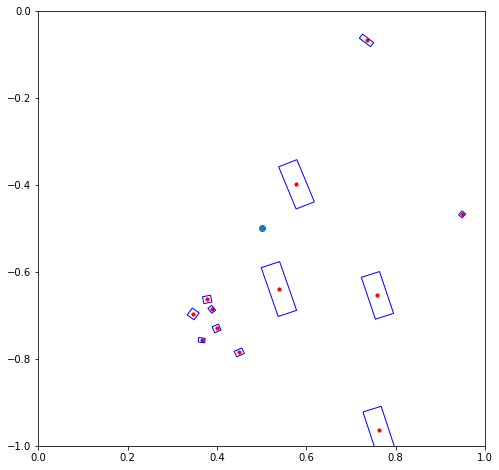

In [25]:
out = non_max_suppression(output,conf_thres = 0.75,nms_thres = 0.1)
out[0][:,:2] /=1024
out[0][:,3:5] /=1024
#print(loss)
draw(target)

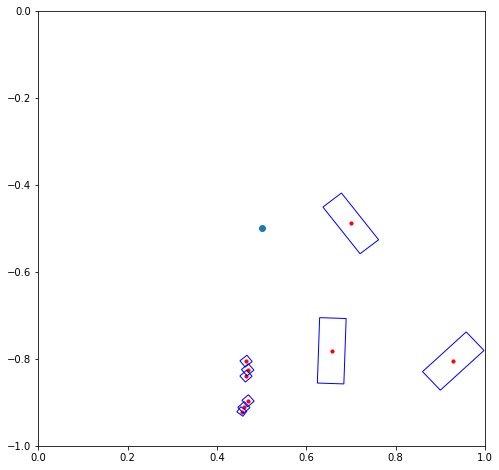

In [26]:
draw(out[0])

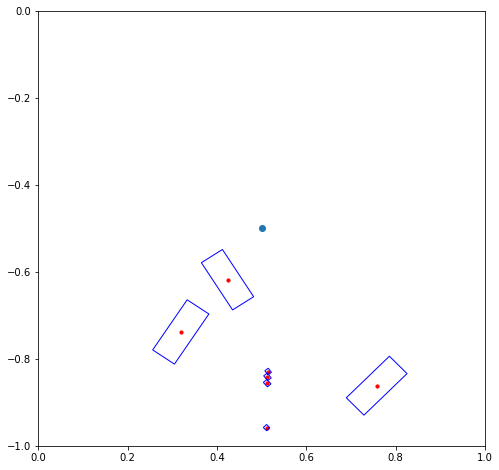

In [ ]:
draw(out[0])

In [ ]:
dpi = 80
im_data = img[0].cpu().permute(1, 2, 0)
height, width, depth = im_data.shape

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
ax.imshow(im_data, cmap='gray')

plt.show()

In [ ]:
!mv "singledepthyolo(leastnoparameters-starting).pth" checkpoints/

#Testing (Nuscene's Basics)

In [ ]:
classes = nusc.get('category',)

In [ ]:
model.eval()

In [ ]:
img, label = next(iter(dataloader))
print(img.shape)

In [ ]:
loss, out = model(img.to(device),label.to(device))

In [ ]:
print(non_max_suppression(out.to(device))[1].shape)

In [ ]:
print(out.shape)

In [ ]:
del imgs,targets,out,loss
torch.cuda.empty_cache()

In [ ]:
print(label[:,2].max())

In [ ]:
print(label[:,2].max())

In [ ]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes 

nusc = NuScenes(version='v1.0-mini', dataroot='drive/My Drive/data', verbose=True)

In [ ]:
scene = nusc.scene[0]
scene

In [ ]:
sample_token = scene['first_sample_token']
sample = nusc.get('sample',sample_token)
sample

In [ ]:
for first_anno in sample['anns'] :
  anno = nusc.get('sample_annotation',first_anno)
  vis = nusc.get('visibility',anno['visibility_token'])
  print(vis)

In [ ]:
vis = nusc.get('visibility',anno['visibility_token'])
vis

In [ ]:
import json


with open('/content/drive/My Drive/data/v1.0-mini/category.json') as f:
  data = json.load(f)
for d in data:
  print(d['name'])

In [ ]:
img,targets = iter(dataloader).next()
plt.imshow(  img[0].permute(1, 2, 0)  )

In [ ]:
output = model(img.to(device))
print(output[...,8].max())

In [ ]:
output = non_max_suppression(output,conf_thres=0.9)
print(output[0].shape)

In [ ]:
print(targets)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.patches as patches
from IPython.display import clear_output
import time

In [ ]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for annotation in targets:
  annotation = nusc.get('sample_annotation',annotation)
  cordinate = [annotation['translation'][i] - ego_pose['translation'][i] for i in range(3)]
  cordinate[0], cordinate[1] = rotate_around_point_lowperf(cordinate[:2], ego_yaw, origin=(0, 0))
  rotation_yaw = quaternion_yaw(annotation['rotation']) - math.pi/2
  print("rotation_yaw = ", quaternion_yaw(annotation['rotation']) + math.pi )
  object_rotation = rotation_yaw - ego_yaw
  height = annotation['size'][0]
  width = annotation['size'][1]
  x_temp, y_temp = rotate_around_point_lowperf((cordinate[0],cordinate[1]),2*math.pi -  (object_rotation+math.pi/2), origin=(cordinate[0]-width/2, cordinate[1] - height/2))
  x_offset, y_offset = x_temp - cordinate[0], y_temp - cordinate[1]
  rectas = patches.Rectangle(xy=((cordinate[0]-width/2) - x_offset, (cordinate[1] - height/2) - y_offset) ,width=width, angle = (object_rotation+math.pi/2)*180/math.pi, height=height, linewidth=1, color='blue', fill=False)
  ax.add_patch(rectas)
  ax.scatter(cordinate[0], cordinate[1], color = 'red', s=10)
  break
ax.scatter(0, 0)
plt.xlim(-80,80)
plt.ylim(-80,80)
plt.show()

In [ ]:
dataset.categories[18]

#Angle testing

In [ ]:
#30degree
rotation_yaw = 0
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

In [ ]:
#120degree
rotation_yaw = math.pi/2 
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

In [ ]:
#210degree
rotation_yaw = math.pi
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

In [ ]:
#300degree
rotation_yaw = 3*math.pi/2
r1 = (1 + math.sin(rotation_yaw))/2
r2 = (1 + math.cos(rotation_yaw))/2
print(r1,r2)
teta1 = math.asin(2*r1 - 1)
teta2 = math.acos(2*r2 - 1)
print(teta1,teta2)
print(angle_decoder([r1,r2])*180/math.pi)

#Intersection Area Testing

In [ ]:
from turfpy.transformation import intersect
from turfpy.measurement import area
from geojson import Feature
f = Feature(geometry={"coordinates": [
[[-122.801742, 45.48565], [-122.801742, 45.60491],
[-122.584762, 45.60491], [-122.584762, 45.48565],
[-122.801742, 45.48565]]], "type": "Polygon"})
b = Feature(geometry={"coordinates": [
[[-122.520217, 45.535693], [-122.64038, 45.553967],
[-122.720031, 45.526554], [-122.669906, 45.507309],
[-122.723464, 45.446643], [-122.532577, 45.408574],
[-122.487258, 45.477466], [-122.520217, 45.535693]
]], "type": "Polygon"})
inter = intersect([f, b])
area(inter)

In [ ]:
!pip install turfpy